<a href="https://colab.research.google.com/github/ArafatHossen-Patwary/Book-Store-Management-Project/blob/master/MpoxNewTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os

base_path = '/content/drive/MyDrive'
for root, dirs, files in os.walk(base_path):
    print(root)

/content/drive/MyDrive
/content/drive/MyDrive/EAP 101
/content/drive/MyDrive/SP 103
/content/drive/MyDrive/Phy 103
/content/drive/MyDrive/SP leb
/content/drive/MyDrive/Phy leb
/content/drive/MyDrive/Phy leb/Data entry
/content/drive/MyDrive/222 Batch (Summer 2022)
/content/drive/MyDrive/CSE 104 Structured Programming Lab Fall 22 D8
/content/drive/MyDrive/Classroom
/content/drive/MyDrive/Classroom/Fall 2022 EAP 101 D-2 (CSE)
/content/drive/MyDrive/Classroom/D-77 Chemistry
/content/drive/MyDrive/Classroom/D-80-MATH-101 LINEAR ALGEBRA & COORDINATE GEOMETRY
/content/drive/MyDrive/Classroom/DIU_CSE_201_D-77
/content/drive/MyDrive/Classroom/D-77-MATH-201 Statistical Methods & Probability
/content/drive/MyDrive/Classroom/Fall23 CSE D77 GED-201 4th Sem
/content/drive/MyDrive/Classroom/Electrical Circuits Batch- D-77
/content/drive/MyDrive/Classroom/D-77:MATH-202 DIFFERENTIAL EQUATIONS & VECTOR ANALYSIS
/content/drive/MyDrive/Classroom/D-77 Computer Organization & Architecture
/content/drive/My

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
from imblearn.over_sampling import ADASYN
import cv2 as cv
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.pipeline import Pipeline
import joblib
import h5py

In [4]:
os.makedirs('/content/drive/MyDrive/Mpox_case_1/data')

In [5]:
os.makedirs('/content/drive/MyDrive/Mpox_case_1/data/Monkeypox')
os.makedirs('/content/drive/MyDrive/Mpox_case_1/data/Others')

In [6]:
data_paths=[]
labels=[]

In [7]:
import os

data_paths = []
labels = []

for i in os.listdir('/content/drive/MyDrive/Mpox_case_1/Augmented Images/Augmented Images'):
    for ii in os.listdir('/content/drive/MyDrive/Mpox_case_1/Augmented Images/Augmented Images' + '/' + i):
        data_paths.append('/content/drive/MyDrive/Mpox_case_1/Augmented Images/Augmented Images' + '/' + i + '/' + ii)
        labels.append(i)

In [8]:
import os

data_paths = []
labels = []

base_path = '/content/drive/MyDrive/Mpox_case_1/Fold1/Fold1/Fold1'

for i in os.listdir(base_path):
    for ii in os.listdir(f'{base_path}/{i}'):
        for iii in os.listdir(f'{base_path}/{i}/{ii}'):
            data_paths.append(f'{base_path}/{i}/{ii}/{iii}')
            labels.append(ii)

In [9]:
import os

data_paths = []
labels = []

base_path = '/content/drive/MyDrive/Mpox_case_1/Original Images/Original Images'

for i in os.listdir(base_path):
    for ii in os.listdir(f'{base_path}/{i}'):
        data_paths.append(f'{base_path}/{i}/{ii}')
        labels.append(i)

In [10]:
df=pd.DataFrame({
    'paths': data_paths,
    'labels': labels
})

In [11]:
df['labels']=df['labels'].replace('Monkeypox_augmented','Monkeypox')
df['labels']=df['labels'].replace('Others_augmented','Others')
df['labels']=df['labels'].replace('Monkey Pox','Monkeypox')

In [12]:
df['labels'].unique()

array(['Monkeypox', 'Others'], dtype=object)

In [13]:
from collections import Counter

Text(0.5, 0, 'Class')

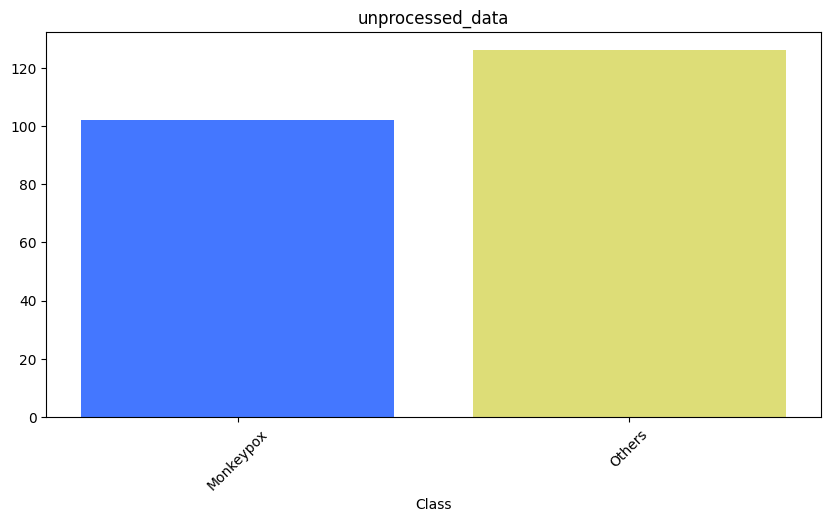

In [14]:
count=Counter(df['labels'])
plt.figure(figsize=(10,5))
plt.bar(count.keys(),count.values(),color=['#47f','#dd7'])
plt.xticks(rotation=45)
plt.title('unprocessed_data')
plt.xlabel('Class')

In [15]:
def extract_features_with_ResNet(img_paths):
    resnet_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')
    features = []
    for img_path in img_paths:
        img = cv.imread(img_path)
        img=cv.resize(img,(224,224))
        image = preprocess_input(np.expand_dims(img, axis=0))

    # Extract features
        feature = resnet_model.predict(image)
        features.append(feature.flatten())
    return np.array(features)

In [16]:
print(f'{df["labels"].unique()[0]}:0 ,{df["labels"].unique()[1]}:1 ')

Monkeypox:0 ,Others:1 


In [17]:
X = extract_features_with_ResNet(df.iloc[:,0])

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━

In [18]:
y = df.iloc[:,1].values

In [19]:
ADA=ADASYN()
X_syn , y_syn=ADA.fit_resample(X,y)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_syn, y_syn, test_size=0.2, random_state=42, stratify=y_syn)

In [21]:
y_train

array(['Others', 'Monkeypox', 'Others', 'Monkeypox', 'Others',
       'Monkeypox', 'Others', 'Others', 'Monkeypox', 'Monkeypox',
       'Monkeypox', 'Others', 'Monkeypox', 'Others', 'Monkeypox',
       'Others', 'Monkeypox', 'Monkeypox', 'Others', 'Others', 'Others',
       'Monkeypox', 'Others', 'Monkeypox', 'Monkeypox', 'Others',
       'Monkeypox', 'Monkeypox', 'Others', 'Monkeypox', 'Others',
       'Others', 'Others', 'Monkeypox', 'Others', 'Others', 'Others',
       'Monkeypox', 'Others', 'Others', 'Monkeypox', 'Monkeypox',
       'Monkeypox', 'Monkeypox', 'Others', 'Monkeypox', 'Others',
       'Monkeypox', 'Monkeypox', 'Monkeypox', 'Monkeypox', 'Others',
       'Monkeypox', 'Monkeypox', 'Monkeypox', 'Monkeypox', 'Others',
       'Monkeypox', 'Monkeypox', 'Monkeypox', 'Monkeypox', 'Others',
       'Monkeypox', 'Monkeypox', 'Others', 'Others', 'Others',
       'Monkeypox', 'Others', 'Monkeypox', 'Others', 'Others', 'Others',
       'Monkeypox', 'Monkeypox', 'Monkeypox', 'Monkeypo

In [32]:
clf = SVC(kernel='poly', C=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8333333333333334
              precision    recall  f1-score   support

   Monkeypox       0.86      0.78      0.82        23
      Others       0.81      0.88      0.85        25

    accuracy                           0.83        48
   macro avg       0.84      0.83      0.83        48
weighted avg       0.84      0.83      0.83        48



<Axes: >

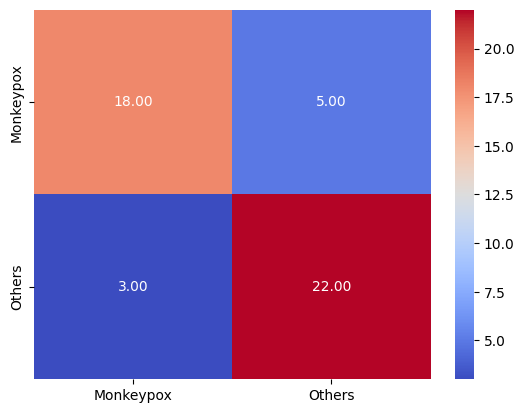

In [27]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt=".2f", cmap="coolwarm" , xticklabels=clf.classes_ ,yticklabels=clf.classes_ )

In [28]:
def resnet50(image):
    resnet_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, pooling='avg')
    image=cv.resize(image,(224,224))
    image = tf.keras.applications.resnet50.preprocess_input(np.expand_dims(img, axis=0))

# Extract features
    feature = resnet_model.predict(image)
    return features.flatten()

In [30]:
from sklearn.pipeline import Pipeline
import joblib
import io
import h5py
import numpy as np
import os

# Make sure you define or load resnet50 and clf beforehand
# Example placeholders:
# resnet50 = YourPreprocessingTransformer()
# clf = YourTrainedClassifier()

# Create pipeline
pipeline = Pipeline([
    ("resnet_preprocessor", resnet50),
    ("svm", clf),
])

# Define path to save the model
save_path = "/content/drive/MyDrive/Mpox_case_1/combined_model.h5"

# Save the pipeline into an HDF5 file
with h5py.File(save_path, "w") as h5f:
    # Serialize the pipeline into a binary buffer
    pipeline_buffer = io.BytesIO()
    joblib.dump(pipeline, pipeline_buffer)
    pipeline_buffer.seek(0)  # Move to the start of the buffer

    # Save the binary buffer to the HDF5 file
    h5f.create_dataset("svm_model", data=np.void(pipeline_buffer.read()))

print("Model saved as combined_model.h5 in Google Drive.")

Model saved as combined_model.h5 in Google Drive.
